In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('얍💢')

얍💢


In [2]:
data_dir = join(os.getcwd(), 'data')

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('얍💢')

얍💢


In [3]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
print(type(train['date'][0]))
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
print(type(train['date'][0]))

<class 'str'>
<class 'numpy.int32'>


In [5]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
del test['id']
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


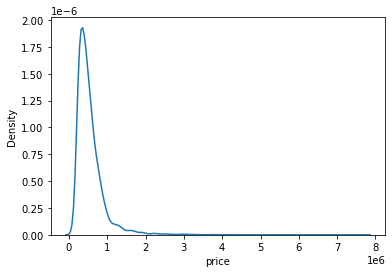

In [8]:
sns.kdeplot(data=y)
plt.show()

In [9]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

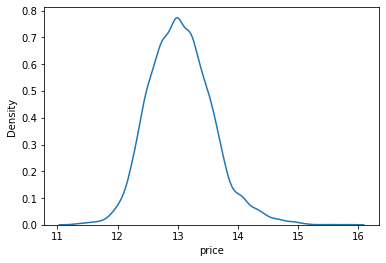

In [10]:
sns.kdeplot(y)
plt.show()

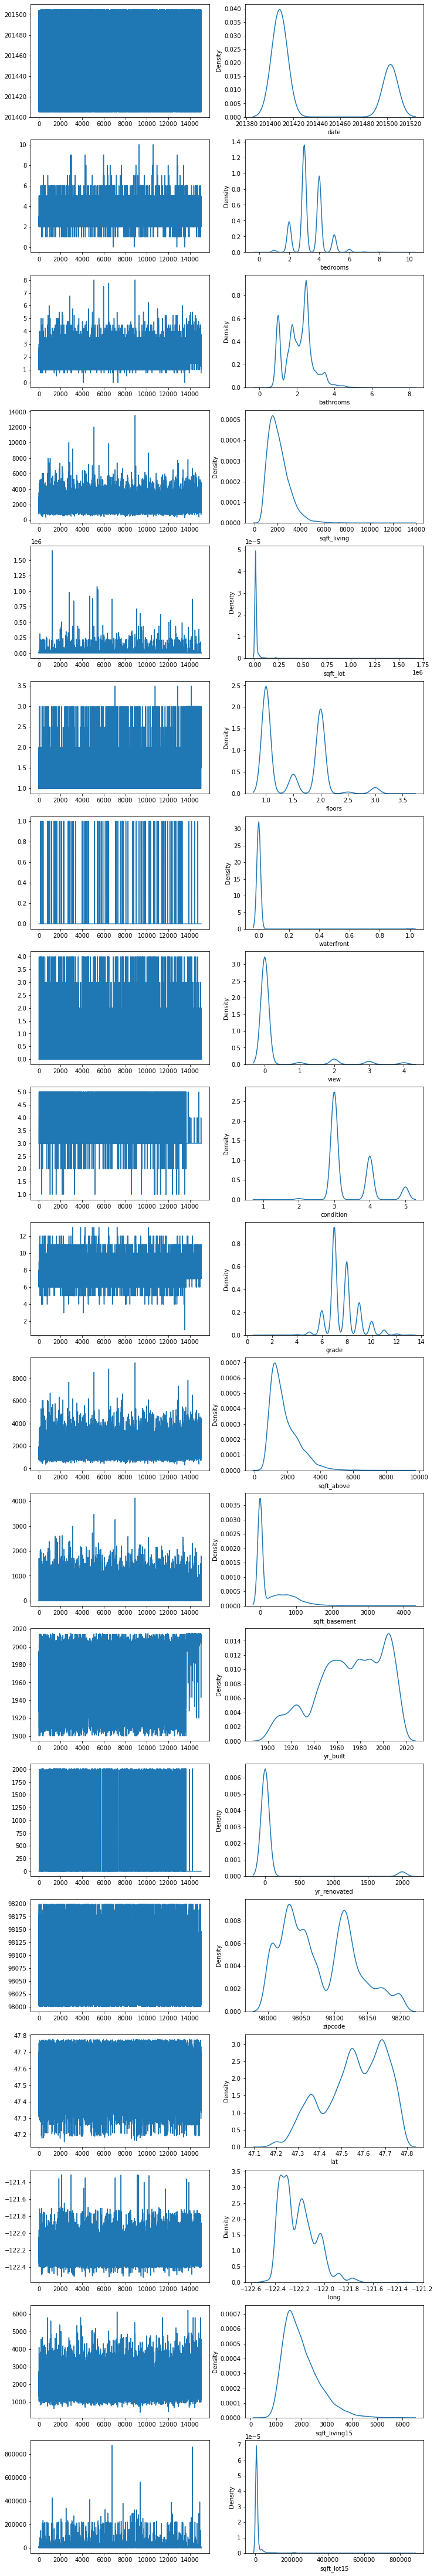

In [11]:
columns = train.columns
fig, ax = plt.subplots(len(columns), 2, figsize=(12, 80))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 
for row in range(len(columns)):
    train[columns[row]].plot(subplots=True, ax=ax[row][0])
    sns.kdeplot(data=train[columns[row]], ax=ax[row][1])
    
#    ax[row][0].set_title("raw_{}".format(columns[count]), fontsize=15)
#    ax[row][1].set_title("KDE_{}".format(columns[count]), fontsize=15)

In [12]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']
#for c in columns:
#    train[c] = np.log1p(train[c].values)
for c in columns:    
    if c in skew_columns:
        train[c] = np.log1p(train[c].values)

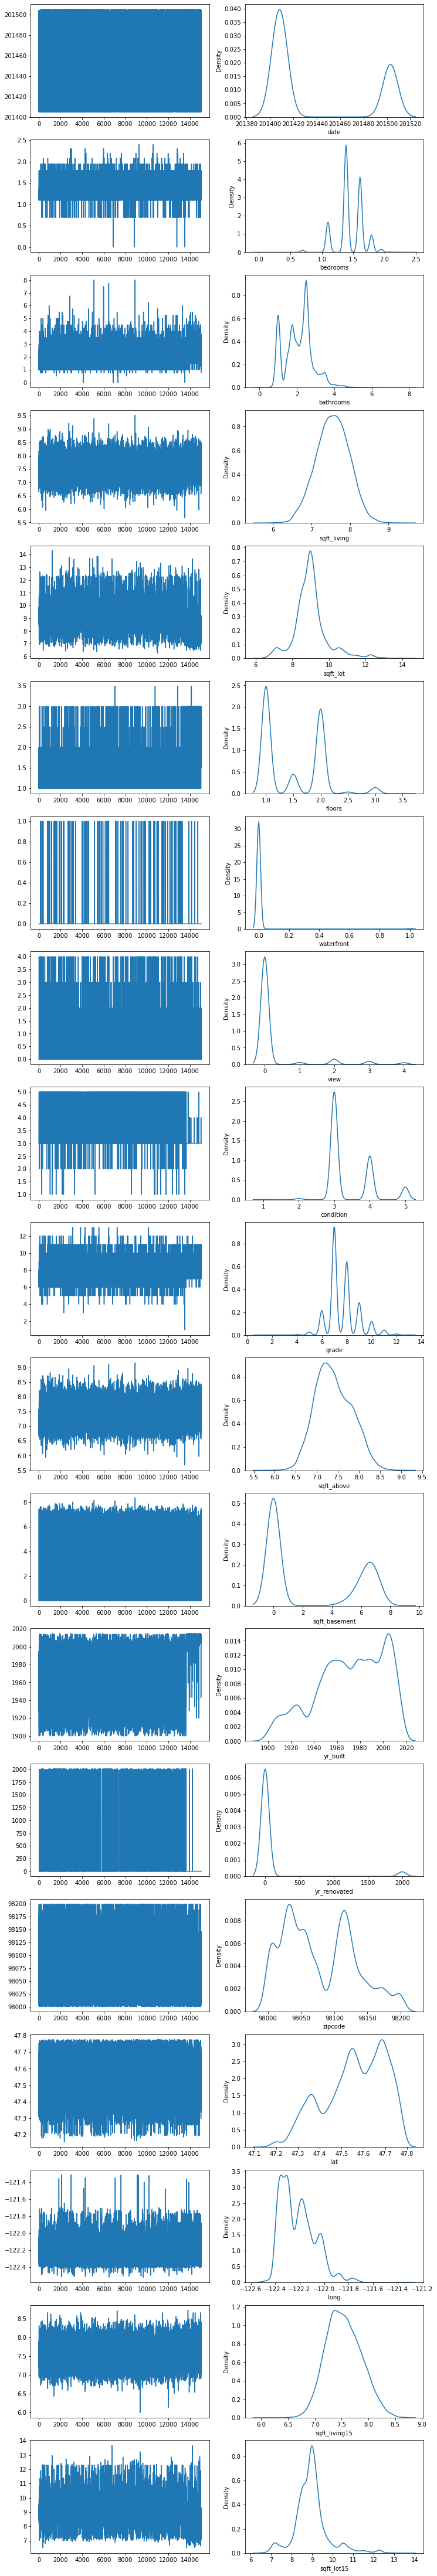

In [13]:
fig, ax = plt.subplots(len(columns), 2, figsize=(12, 80))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 
for row in range(len(columns)):
    train[columns[row]].plot(subplots=True, ax=ax[row][0])
    sns.kdeplot(data=train[columns[row]], ax=ax[row][1])

In [14]:
"""
index = []
index.extend(train[train['bedrooms'] <= 0.2].index)
index.extend(train[train['sqft_living'] <= 0.1].index)
index.extend(train[train['floors'] >= 0.9].index)
index.extend(train[train['grade'] <= 0.1].index)
index.extend(train[train['sqft_above'] <= 0.1].index)
index.extend(train[train['sqft_living15'] <= 0.1].index)
index = list(set(index))
train.drop(index, inplace=True)
y.drop(index, inplace=True)
"""

"\nindex = []\nindex.extend(train[train['bedrooms'] <= 0.2].index)\nindex.extend(train[train['sqft_living'] <= 0.1].index)\nindex.extend(train[train['floors'] >= 0.9].index)\nindex.extend(train[train['grade'] <= 0.1].index)\nindex.extend(train[train['sqft_above'] <= 0.1].index)\nindex.extend(train[train['sqft_living15'] <= 0.1].index)\nindex = list(set(index))\ntrain.drop(index, inplace=True)\ny.drop(index, inplace=True)\n"

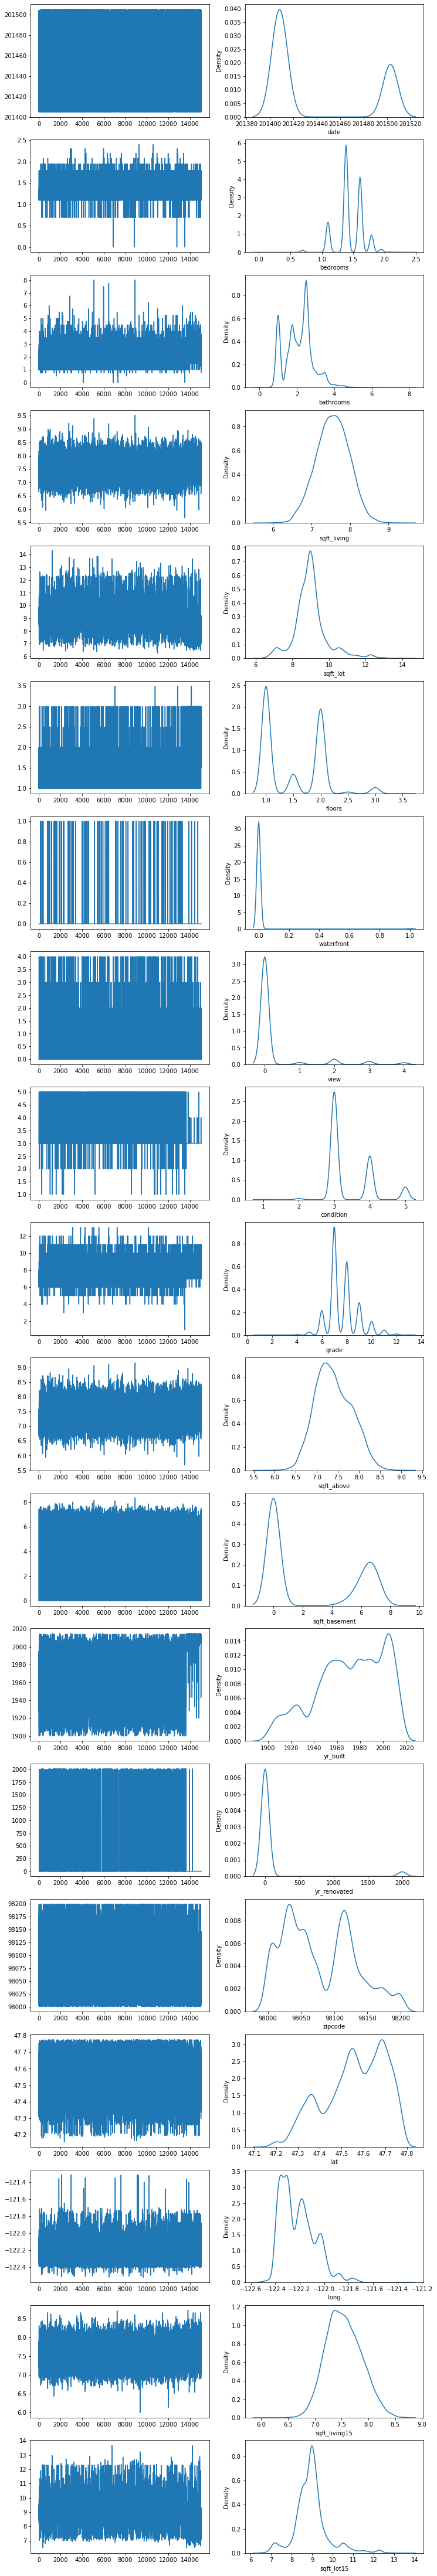

In [15]:
fig, ax = plt.subplots(len(columns), 2, figsize=(12, 80))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 
for row in range(len(columns)):
    train[columns[row]].plot(subplots=True, ax=ax[row][0])
    sns.kdeplot(data=train[columns[row]], ax=ax[row][1])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('얍💢')

얍💢


In [17]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('얍💢')

얍💢


In [18]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('얍💢')

얍💢


In [19]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('얍💢')

얍💢


In [20]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [21]:
def get_scores(models, train, y):
    df = {}
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df[model_name] = rmse(y_test, y_pred)
    return pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128370.486911
RandomForestRegressor,125228.641553
LGBMRegressor,111906.268088
XGBRegressor,110319.724637


In [22]:
print(train.shape, y.shape)
temp_train = pd.concat([train, y], axis=1)
print(temp_train.shape)
temp_train.head()

(15035, 19) (15035,)
(15035, 20)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,201410,1.386294,1.00,7.074117,8.639588,1.0,0,0,3,7,7.074117,0.0,1955,0,98178,47.5112,-122.257,7.201171,8.639588,12.309987
1,201502,1.098612,1.00,6.647688,9.210440,1.0,0,0,3,6,6.647688,0.0,1933,0,98028,47.7379,-122.233,7.908755,8.995041,12.100718
2,201502,1.386294,2.00,7.427144,8.997271,1.0,0,0,3,8,7.427144,0.0,1987,0,98074,47.6168,-122.045,7.496097,8.923191,13.142168
3,201406,1.386294,2.25,7.447751,8.827615,2.0,0,0,3,7,7.447751,0.0,1995,0,98003,47.3097,-122.327,7.713785,8.827615,12.458779
4,201501,1.386294,1.50,6.966967,9.181118,1.0,0,0,3,7,6.966967,0.0,1963,0,98198,47.4095,-122.315,7.409136,9.181118,12.583999


In [23]:
#https://velog.io/@jaehyeong/Kaggle-%EB%B3%B4%EC%8A%A4%ED%84%B4-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1House-Prices-Advanced-Regression-Techniques#2-feature-selection---variables-of-corrleation--03
corrmat = temp_train.corr()
top_corr_features = corrmat.index[abs(corrmat["price"])>=0.3]
top_corr_features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade',
       'sqft_above', 'lat', 'sqft_living15', 'price'],
      dtype='object')

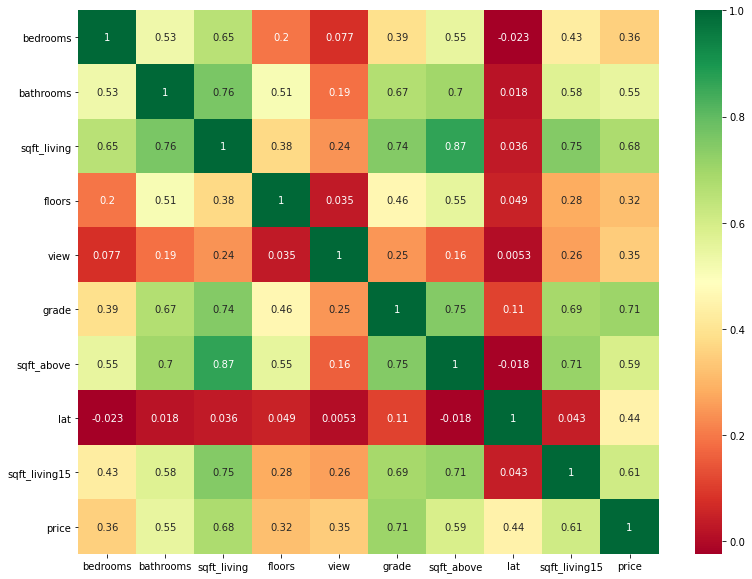

In [24]:
# heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(temp_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
get_scores(models, train[top_corr_features[:-1]], y)

,RMSE
RandomForestRegressor,164387.980925
GradientBoostingRegressor,163202.901451
LGBMRegressor,160474.307734
XGBRegressor,158460.715008


In [26]:
from sklearn.model_selection import GridSearchCV
print('얍💢')

얍💢


In [27]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [28]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [29]:
#https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663
param_grid = {
 'objective': ['reg:squarederror'],
 'base_score': [None],
 'booster': [None],
 'colsample_bylevel': [None],
 'colsample_bynode': [None],
 'colsample_bytree': [0.5, 0.75, 1],    
# 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 'enable_categorical': [False],
# 'gamma': [0, 1, 2, 3, 4, 5],
 'gamma': [0, 3, 5],    
 'gpu_id': [0],
 'importance_type': [None],
 'interaction_constraints': [None],
# 'learning_rate': [0.4, 0.3, 0.2 ,0.1, 0.05, 0.03, 0.01],
 'learning_rate': [0.1, 0.05, 0.03, 0.01],    
 'max_delta_step': [None],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
 'min_child_weight': [None],
 'monotone_constraints': [None],
# 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'n_estimators': [100, 300, 500, 700, 800],    
 'num_parallel_tree': [None],
 'predictor': [None],
 'random_state': [None],
 'reg_alpha': [None],
 'reg_lambda': [None],
 'scale_pos_weight': [None],
# 'subsample': [0.6, 0.7, 0.8, 0.9, 1],
 'subsample': [0.6, 0.8, 1],    
 'tree_method': [None],
 'validate_parameters': [None],
 'verbosity': [None]
}
model = XGBRegressor(random_state=random_state)
tuning_result = my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 67.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 81.3min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 97.2min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 116.1min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 138.9min
[Parallel(n_jobs=-1)]: Done 9097 tasks      |

In [30]:
tuning_result

,base_score,booster,colsample_bylevel,colsample_bynode,colsample_bytree,enable_categorical,gamma,gpu_id,importance_type,interaction_constraints,...,random_state,reg_alpha,reg_lambda,scale_pos_weight,subsample,tree_method,validate_parameters,verbosity,score,RMSLE
329,None,None,None,None,0.5,False,0,0,None,None,...,None,None,None,None,1.0,None,None,None,-0.024965,0.158002
326,None,None,None,None,0.5,False,0,0,None,None,...,None,None,None,None,1.0,None,None,None,-0.024981,0.158055
344,None,None,None,None,0.5,False,0,0,None,None,...,None,None,None,None,1.0,None,None,None,-0.025036,0.158228
313,None,None,None,None,0.5,False,0,0,None,None,...,None,None,None,None,0.8,None,None,None,-0.025045,0.158257
341,None,None,None,None,0.5,False,0,0,None,None,...,None,None,None,None,1.0,None,None,None,-0.025049,0.158269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,None,None,None,None,0.5,False,5,0,None,None,...,None,None,None,None,0.6,None,None,None,-21.248659,4.609627
1335,None,None,None,None,0.5,False,5,0,None,None,...,None,None,None,None,0.6,None,None,None,-21.248659,4.609627
1380,None,None,None,None,0.5,False,5,0,None,None,...,None,None,None,None,0.6,None,None,None,-21.248659,4.609627
1410,None,None,None,None,0.5,False,5,0,None,None,...,None,None,None,None,0.6,None,None,None,-21.248659,4.609627


In [31]:
print(tuning_result.iloc[0])
params = tuning_result.iloc[0].to_dict()
#del(params['score'])
#del(params['RMSLE'])
print(params)
#lightgbm_2 = LGBMRegressor(random_state=random_state, params)

"""
lightgbm_2 = LGBMRegressor(random_state=random_state, )
X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
lightgbm_2.fit(X_train, y_train)
y_pred = lightgbm_2.predict(X_test)
print(rmse(y_test, y_pred))
"""

base_score                             None
booster                                None
colsample_bylevel                      None
colsample_bynode                       None
colsample_bytree                        0.5
enable_categorical                    False
gamma                                     0
gpu_id                                    0
importance_type                        None
interaction_constraints                None
learning_rate                          0.03
max_delta_step                         None
max_depth                                 8
min_child_weight                       None
monotone_constraints                   None
n_estimators                            800
num_parallel_tree                      None
objective                  reg:squarederror
predictor                              None
random_state                           None
reg_alpha                              None
reg_lambda                             None
scale_pos_weight                

'\nlightgbm_2 = LGBMRegressor(random_state=random_state, )\nX_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)\nlightgbm_2.fit(X_train, y_train)\ny_pred = lightgbm_2.predict(X_test)\nprint(rmse(y_test, y_pred))\n'

In [33]:
XGBRegressor_2 = XGBRegressor(random_state=random_state, colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=8, n_estimators=800, subsample=1)
X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
XGBRegressor_2.fit(X_train, y_train)
y_pred_2 = XGBRegressor_2.predict(X_test)
print(rmse(y_test, y_pred_2))

104642.96368690633


In [38]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']
for c in columns:    
    if c in skew_columns:
        test[c] = np.log1p(test[c].values)

In [39]:
test.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201412,1.386294,2.25,7.852050,8.887791,2.0,0,0,3,7,7.682943,5.993961,1951,1991,98125,47.7210,-122.319,7.433075,8.941153
1,201412,1.609438,3.00,7.581210,8.517393,1.0,0,0,5,7,6.957497,6.814543,1965,0,98136,47.5208,-122.393,7.215975,8.517393
2,201405,1.609438,4.50,8.598036,11.532051,1.0,0,0,3,11,8.266421,7.333676,2001,0,98053,47.6561,-122.005,8.468213,11.532051
3,201504,1.386294,1.00,7.484930,8.918784,1.0,0,0,3,7,6.957497,6.594413,1960,0,98146,47.5123,-122.337,7.484930,9.001346
4,201503,1.386294,2.50,7.544861,8.788898,2.0,0,0,3,7,7.544861,0.000000,2003,0,98038,47.3684,-122.031,7.779467,8.932080


In [42]:
prediction = XGBRegressor_2.predict(test)
prediction = np.expm1(prediction)
prediction

array([ 530075.  ,  472390.4 , 1301545.1 , ...,  476728.34,  316223.72,
        422433.1 ], dtype=float32)

In [44]:
submission_path = join(data_dir, 'sample_submission_106669.csv')
submission = pd.read_csv(submission_path)
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.300750e+05
1,15036,4.723904e+05
2,15037,1.301545e+06
3,15038,3.120809e+05
4,15039,3.290905e+05


In [46]:
submission.to_csv(join(data_dir, 'submission.csv'), index=False)